# Gaspard
> Gaspard is a helper for Google's Gemini Models

In [ ]:
#| hide

from nbdev import show_doc
from fastcore.utils import *
from IPython import display

## Install

```sh
pip install gaspard
```

## Getting started

Follow the [instructions](https://aistudio.google.com/app/apikey) to generate an API key, and set it as an evironment variable as shown below:

```sh
export GEMINI_API_KEY=YOUR_API_KEY
```

Gemini's Python SDK will automatically be installed with Gaspard, if you don't already have it.

In [ ]:
from gaspard import *

Gaspard provides models, which lists the models available in the SDK

In [ ]:
models

('gemini-1.5-pro-exp-0827',
 'gemini-1.5-flash-exp-0827',
 'gemini-1.5-pro',
 'gemini-1.5-flash')

For our examples we'll use `gemini-1.5-flash` since it's relatively faster and cheaper.

In [ ]:
model = models[-1]

## Chat

The main interface to Gaspard is the `Chat` class which provides a stateful interface to the models

In [ ]:
chat = Chat(model, sp="""You are a helpful and concise assistant.""")
chat("I'm Faisal")

Nice to meet you, Faisal! 😊  What can I help you with today? 

<details>

- content: {'parts': [{'text': 'Nice to meet you, Faisal! 😊  What can I help you with today? \n'}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 13
- candidates_token_count: 17
- total_token_count: 30
- cached_content_token_count: 0

</details>

In [ ]:
r = chat("What's my name?")
r

Your name is Faisal. 😊 

<details>

- content: {'parts': [{'text': 'Your name is Faisal. 😊 \n'}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 40
- candidates_token_count: 6
- total_token_count: 46
- cached_content_token_count: 0

</details>

As you see above, displaying the results of a call in a notebook shows just the message contents, with the other details hidden behind a collapsible section. Alternatively you can print the details:



In [ ]:
print(r)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Your name is Faisal. \ud83d\ude0a \n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBLE"
            }
          ]
        }
      ],
      "usage_metadata": {


You can use stream=True to stream the results as soon as they arrive (although you will only see the gradual generation if you execute the notebook yourself, of course!)

In [ ]:
chat.h

[{'role': 'user', 'parts': [{'text': "I'm Faisal"}]},
 {'role': 'model',
  'parts': ['Nice to meet you, Faisal! 😊  What can I help you with today? \n']},
 {'role': 'user', 'parts': [{'text': "What's my name?"}]},
 {'role': 'model', 'parts': ['Your name is Faisal. 😊 \n']}]

In [ ]:
for o in chat("What's your name?", stream=True): print(o, end='')

I don't have a name. I'm a large language model, and I'm here to help you with information and tasks. 😊 


Woah, welcome back to the land of the living Bard!

## Tool use

Tool use lets the model use external tools.

We use docments to make defining Python functions as ergonomic as possible. Each parameter (and the return value) should have a type, and a docments comment with the description of what it is. As an example we'll write a simple function that adds numbers together, and will tell us when it's being called:


In [ ]:
def sums(
    a:int,  # First thing to sum
    b:int=1 # Second thing to sum
) -> int: # The sum of the inputs
    "Adds a + b."
    print(f"Finding the sum of {a} and {b}")
    return a + b

Sometimes the model will say something like "according to the sums tool the answer is" -- generally we'd rather it just tells the user the answer, so we can use a system prompt to help with this:

In [ ]:
sp = "Never mention what tools you use."

We'll get the model to add up some long numbers:

In [ ]:
a,b = 604542,6458932
pr = f"What is {a}+{b}?"
pr

'What is 604542+6458932?'

To use tools, pass a list of them to Chat:

In [ ]:
chat = Chat(model, sp=sp, tools=[sums])

Now when we call that with our prompt, the model doesn't return the answer, but instead returns a `function_call` message, which means we have to call the named function (tool) with the provided parameters:

In [ ]:
type(pr)

str

In [ ]:
r = chat(pr); r

Finding the sum of 604542.0 and 6458932.0


function_call {
  name: "sums"
  args {
    fields {
      key: "b"
      value {
        number_value: 6458932
      }
    }
    fields {
      key: "a"
      value {
        number_value: 604542
      }
    }
  }
}

<details>

- content: {'parts': [{'function_call': {'name': 'sums', 'args': {'a': 604542.0, 'b': 6458932.0}}}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 76
- candidates_token_count: 29
- total_token_count: 105
- cached_content_token_count: 0

</details>

Gaspard handles all that for us -- we just have to pass along the message, and it all happens automatically:

In [ ]:
chat.h

[{'role': 'user', 'parts': [{'text': 'What is 604542+6458932?'}]},
 {'role': 'model',
  'parts': [function_call {
     name: "sums"
     args {
       fields {
         key: "b"
         value {
           number_value: 6458932
         }
       }
       fields {
         key: "a"
         value {
           number_value: 604542
         }
       }
     }
   }]},
 {'role': 'user',
  'parts': [name: "sums"
   response {
     fields {
       key: "result"
       value {
         number_value: 7063474
       }
     }
   }]}]

In [ ]:
chat()

7063474
<details>

- content: {'parts': [{'text': '7063474'}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 126
- candidates_token_count: 7
- total_token_count: 133
- cached_content_token_count: 0

</details>

We can inspect the history to see what happens under the hood. Gaspard calls the tool with the appropriate variables returned by the `function_call` message from the model. The result of calling the function is then sent back to the model, which uses that to respond to the user. 

In [ ]:
chat.h[-3:]

[{'role': 'model',
  'parts': [function_call {
     name: "sums"
     args {
       fields {
         key: "b"
         value {
           number_value: 6458932
         }
       }
       fields {
         key: "a"
         value {
           number_value: 604542
         }
       }
     }
   }]},
 {'role': 'user',
  'parts': [name: "sums"
   response {
     fields {
       key: "result"
       value {
         number_value: 7063474
       }
     }
   }]},
 {'role': 'model', 'parts': ['7063474']}]

You can see how many tokens have been used at any time by checking the `use` property.

In [ ]:
chat.use

In: 202; Out: 36; Total: 238

## Tool loop

We can do everything needed to use tools in a single step, by using Chat.toolloop. This can even call multiple tools as needed solve a problem. For example, let's define a tool to handle multiplication:

In [ ]:
def mults(
    a:int,  # First thing to multiply
    b:int=1 # Second thing to multiply
) -> int: # The product of the inputs
    "Multiplies a * b."
    print(f"Finding the product of {a} and {b}")
    return a * b

Now with a single call we can calculate `(a+b)*2` -- by passing `show_trace` we can see each response from the model in the process:

In [ ]:
chat = Chat(model, sp=sp, tools=[sums,mults])
pr = f'Calculate ({a}+{b})*2'
pr

'Calculate (604542+6458932)*2'

In [ ]:
def pchoice(r): print(r.parts[0])

In [ ]:
r = chat.toolloop(pr, trace_func=pchoice)

Finding the sum of 604542.0 and 6458932.0
function_call {
  name: "sums"
  args {
    fields {
      key: "b"
      value {
        number_value: 6458932
      }
    }
    fields {
      key: "a"
      value {
        number_value: 604542
      }
    }
  }
}

Finding the product of 7063474.0 and 2.0
function_call {
  name: "mults"
  args {
    fields {
      key: "b"
      value {
        number_value: 2
      }
    }
    fields {
      key: "a"
      value {
        number_value: 7063474
      }
    }
  }
}

text: "The answer is 14126948. \n"



We can see from the trace above that the model correctly calls the sums function first to add the numbers inside the parenthesis and then calls the mults function to multiply the result of the summation by `2`. The response sent back to the user is the actual result after performing the chained tool calls, shown below:

In [ ]:
r

The answer is 14126948. 

<details>

- content: {'parts': [{'text': 'The answer is 14126948. \n'}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 226
- candidates_token_count: 13
- total_token_count: 239
- cached_content_token_count: 0

</details>

## Structured Outputs

If you just want the immediate result from a single tool, use `Client.structured`.

In [ ]:
cli = Client(model)

In [ ]:
def sums(
    a:int,  # First thing to sum
    b:int=1 # Second thing to sum
) -> int: # The sum of the inputs
    "Adds a + b."
    print(f"Finding the sum of {a} and {b}")
    return a + b

In [ ]:
cli.structured("What is 604542+6458932", sums)

Finding the sum of 604542.0 and 6458932.0


[7063474.0]

This is particularly useful for getting back structured information, e.g:

In [ ]:
class President(BasicRepr):
    "Information about a president of the United States"
    def __init__(self, 
                first:str, # first name
                last:str, # last name
                spouse:str, # name of spouse
                years_in_office:str, # format: "{start_year}-{end_year}"
                birthplace:str, # name of city
                birth_year:int # year of birth, `0` if unknown
        ):
        assert re.match(r'\d{4}-\d{4}', years_in_office), "Invalid format: `years_in_office`"
        store_attr()

In [ ]:
cli.structured("Provide key information about the 3rd President of the United States", President)[0]

President(first='Thomas', last='Jefferson', spouse='Martha Wayles Skelton', years_in_office='1801-1809', birthplace='Shadwell, Virginia', birth_year=1743.0)

## Images

As everyone knows, when testing image APIs you have to use a cute puppy. But, that's boring, so here's a baby hippo instead.

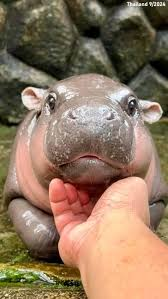

In [ ]:
img_fn = Path('samples/baby_hippo.jpg')
display.Image(filename=img_fn, width=200)

We create a `Chat` object as before:

In [ ]:
chat = Chat(model)

For Gaspard, we can simply pass `Path` objects that repsent the path of the images. To pass multi-part messages, such as an image along with a prompt, we simply pass in a list of items. Note that Gaspard expects each item to be a text or a `Path` object.

In [ ]:
chat([img_fn, "In brief, is happening in the photo?"])

Uploading media...

A small hippopotamus is resting its head on a person's hand.
<details>

- content: {'parts': [{'text': "A small hippopotamus is resting its head on a person's hand."}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 268
- candidates_token_count: 15
- total_token_count: 283
- cached_content_token_count: 0

</details>

Under the hood, Gaspard uploads the image using Gemini's `File API` and passes a reference to the model. Gemini API will automatically infer the MIME type, and convert it appropriately. NOTE that the image is also included in input tokens.

In [ ]:
chat.use

In: 268; Out: 15; Total: 283

Alternatively, Gaspard supports creating a multi-stage chat with separate image and text prompts. For instance, you can pass just the image as the initial prompt (in which case the model will make some general comments about what it sees), and then follow up with questions in additional prompts:

In [ ]:
chat = Chat(model)
chat(img_fn)

Uploading media...

This is a very cute photo of a baby hippopotamus. It looks like it's being petted by a human hand. The hippopotamus has a very sweet expression on its face and looks very happy to be getting attention. The photo is taken from a close up perspective, which makes the hippopotamus look even cuter.
<details>

- content: {'parts': [{'text': "This is a very cute photo of a baby hippopotamus. It looks like it's being petted by a human hand. The hippopotamus has a very sweet expression on its face and looks very happy to be getting attention. The photo is taken from a close up perspective, which makes the hippopotamus look even cuter."}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 259
- candidates_token_count: 66
- total_token_count: 325
- cached_content_token_count: 0

</details>

In [ ]:
chat('What direction is the hippo facing?')

The hippopotamus is facing **towards the right**. 

<details>

- content: {'parts': [{'text': 'The hippopotamus is facing **towards the right**. \n'}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 334
- candidates_token_count: 10
- total_token_count: 344
- cached_content_token_count: 0

</details>

In [ ]:
chat('What color is it?')

The baby hippopotamus is a light greyish-brown color.  It's also a bit pink on its belly and around its eyes. 

<details>

- content: {'parts': [{'text': "The baby hippopotamus is a light greyish-brown color.  It's also a bit pink on its belly and around its eyes. \n"}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 353
- candidates_token_count: 28
- total_token_count: 381
- cached_content_token_count: 0

</details>

Note that the image is passed in again for every input in the dialog, via the chat history, so the number of input tokens increases quickly with this kind of chat.

In [ ]:
chat.use

In: 946; Out: 104; Total: 1050

## Other Media

Beyond images, we can also pass in other kind of media to Gaspard, such as audio file, video files, documents, etc.

For example, let's try to send a pdf file to the model.

In [ ]:
pdf_fn = Path('samples/attention_is_all_you_need.pdf')

In [ ]:
chat = Chat(model)

In [ ]:
chat([pdf_fn, "In brief, what are the main ideas of this paper?"])

Uploading media...

This paper introduces the Transformer, a new neural network architecture for sequence transduction. It uses attention mechanisms to model dependencies between input and output, rather than recurrent or convolutional neural networks. The Transformer is significantly faster to train and achieves state-of-the-art results on machine translation tasks. The paper also shows that the Transformer generalizes well to other tasks, such as English constituency parsing.
<details>

- content: {'parts': [{'text': 'This paper introduces the Transformer, a new neural network architecture for sequence transduction. It uses attention mechanisms to model dependencies between input and output, rather than recurrent or convolutional neural networks. The Transformer is significantly faster to train and achieves state-of-the-art results on machine translation tasks. The paper also shows that the Transformer generalizes well to other tasks, such as English constituency parsing.'}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 14923
- candidates_token_count: 77
- total_token_count: 15000
- cached_content_token_count: 0

</details>

We can pass in audio files in the same way.

In [ ]:
audio_fn = Path('samples/attention_is_all_you_need.mp3')

In [ ]:
pr = "This is a podcast about the same paper. What important details from the paper are not in the podcast?"

In [ ]:
chat([audio_fn, pr])

Uploading media...

The podcast doesn't mention several important aspects of the paper, including: 

* **Specific details about the architecture of the Transformer.** While the podcast discusses the core idea of attention mechanisms and how they differ from previous models, it doesn't explain the specific details of the Transformer's architecture, such as the number of layers, the dimension of the embeddings, or the specific type of attention mechanism used. 
* **Empirical results for other tasks.** The podcast focuses on machine translation results, but the paper also evaluates the Transformer's performance on English constituency parsing. 
* **Limitations and future directions.** The podcast mentions the authors' acknowledgement of the quadratic cost of attention for long sequences and their suggestion to explore restricted attention mechanisms. However, it doesn't delve deeper into the potential limitations of the Transformer and the authors' specific plans for future research. 
* **The significance of the Transformer for the field of natural language processing.** The podcast mentions the potential for faster training and better results across NLP tasks, but it doesn't elaborate on the broader impact of the Transformer on the field, such as its ability to handle different modalities and the shift from recurrent to attention-based models. 
* **Visualizations of attention.** The podcast doesn't mention the paper's inclusion of visualizations of the attention mechanism, which provide insights into how the model learns to capture syntactic and semantic relationships between words. 

Overall, the podcast provides a high-level overview of the paper, but it doesn't go into the depth of detail that the paper itself provides.


<details>

- content: {'parts': [{'text': "The podcast doesn't mention several important aspects of the paper, including: \n\n* **Specific details about the architecture of the Transformer.** While the podcast discusses the core idea of attention mechanisms and how they differ from previous models, it doesn't explain the specific details of the Transformer's architecture, such as the number of layers, the dimension of the embeddings, or the specific type of attention mechanism used. \n* **Empirical results for other tasks.** The podcast focuses on machine translation results, but the paper also evaluates the Transformer's performance on English constituency parsing. \n* **Limitations and future directions.** The podcast mentions the authors' acknowledgement of the quadratic cost of attention for long sequences and their suggestion to explore restricted attention mechanisms. However, it doesn't delve deeper into the potential limitations of the Transformer and the authors' specific plans for future research. \n* **The significance of the Transformer for the field of natural language processing.** The podcast mentions the potential for faster training and better results across NLP tasks, but it doesn't elaborate on the broader impact of the Transformer on the field, such as its ability to handle different modalities and the shift from recurrent to attention-based models. \n* **Visualizations of attention.** The podcast doesn't mention the paper's inclusion of visualizations of the attention mechanism, which provide insights into how the model learns to capture syntactic and semantic relationships between words. \n\nOverall, the podcast provides a high-level overview of the paper, but it doesn't go into the depth of detail that the paper itself provides.\n\n"}], 'role': 'model'}
- finish_reason: 1
- index: 0
- safety_ratings: [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}]
- token_count: 0
- grounding_attributions: []
- avg_logprobs: 0.0
- prompt_token_count: 22863
- candidates_token_count: 320
- total_token_count: 23183
- cached_content_token_count: 0

</details>

You should be careful and monitor usage as the token usage rack up really fast! 

In [ ]:
chat.use

In: 37786; Out: 397; Total: 38183

We can also use structured outputs with multi-modal data:

In [ ]:
class AudioMetadata(BasicRepr):
    """Class to hold metadata for audio files"""
    def __init__(
        self,
        n_speakers:int, # Number of speakers
        topic:str, # Topic discussed
        summary:str, # 100 word summary
        transcript:list[str], # Transcript of the audio segmented by speaker
    ): store_attr()
pr = "Extract the necessary information from the audio."

In [ ]:
audio_md = cli.structured(mk_msgs([[audio_fn, pr]]), tools=[AudioMetadata])[0]

Uploading media...

In [ ]:
print(f'Number of speakers: {audio_md.n_speakers}')
print(f'Topic: {audio_md.topic}')
print(f'Summary: {audio_md.summary}')
transcript = '\n-'.join(list(audio_md.transcript)[:10])
print(f'Transcript: {transcript}')

Number of speakers: 2.0
Topic: Machine Learning and NLP
Summary: This podcast dives into the paper \"Attention is All You Need\" by Vaswani et al., which introduces a new model architecture called the Transformer, based entirely on attention mechanisms, eliminating recurrence and convolutions used in previous models. This paper addresses limitations in previous models by proposing a new architecture which utilizes a stack of identical layers for both encoder and decoder. The authors highlight the model's capability to efficiently handle long-range dependencies in language, as well as its scalability and efficiency in training. The discussion also touches on the broader implications of this research, opening up new possibilities for sequence transduction tasks in the field of NLP.
Transcript: 00:00 Welcome to our podcast where we dive
-00:01 into groundbreaking research papers.
-00:02 Today, we're discussing Attention is all
-00:03 you need by Vaswani et al.
-00:04 Joining us is an expe